In [1]:
import pandas as pd
import os
import glob
import random
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.patches as mpatches

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import norm

## Data Preparation

In [2]:
path = r'/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets'

In [3]:
all_files = glob.glob(path + "/JeffCo 8th Grade for Scoring*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

In [4]:
for filename in all_files:
    print(filename)

/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 3rd grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 8th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 4th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 10th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 12th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 9th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 6th grade for scoring.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 7th grade.csv
/Users/spencersu/Desktop/JCPS Efficacy Report/Datasets/JeffCo 8th Grade for Scoring - 11th grade for scoring.csv


In [5]:
# grade 8 file has a different first row than the other files
li[1].columns = li[1].iloc[0]

li[1] = li[1].iloc[1:,:]

In [6]:
# grade 4 already has a grade_level column
li[2].columns = li[0].columns

In [7]:
# change all subtype column to a name "subtype"
for num in range(0,9):
    li[num].rename(columns={li[num].columns[2]: "subtype" }, inplace = True)

In [8]:
def unify_col(grade_level, number):
    li[number].insert(7, 'student_grade_level', grade_level)
    li[number].columns = li[0].columns

In [9]:
unify_col(8,1)
unify_col(10,3)
unify_col(12,4)
unify_col(9,5)
unify_col(6,6)
unify_col(7,7)
unify_col(11,8)

In [10]:
df = pd.concat(li, axis=0, ignore_index=True)

In [11]:
df

,id,last_updated,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,gradelink,student_writing,ClaimCounter,Reasons,Evidence,Reasoning,Organization,Audience,Conventions
0,15093927,2/5/21,5,Engelhard Elementary,JUSTIN MEHLING,PDGXBA,Domnyck Scholl,3,NaN,"""No people should not go to space, because the...",3,2,1,1,1,2,4
1,15721060,5/19/21,6,Engelhard Elementary,JUSTIN MEHLING,PDGXBA,Domnyck Scholl,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""No they should not be payed to do school work...",3,2,1,1,1,2,3
2,15079648,2/3/21,5,Trunnell Elementary,Rosa Arnold,FBCLQA,Ezekiel Batista Perera,3,NaN,"""they can go if they want to but they have to ...",3,1,1,1,1,1,4
3,15669336,5/11/21,6,Trunnell Elementary,Rosa Arnold,FBCLQA,Ezekiel Batista Perera,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""students soild not be paid todo homework beca...",3,2,1,1,1,2,3
4,15079657,2/3/21,5,Trunnell Elementary,Rosa Arnold,FBCLQA,Greidys Godinez Vazquez,3,NaN,"""no becuaes it cost to much and there is no ai...",3,2,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,14295390,10/22/20,4,Butler Traditional High,Rebecca Zaboronak,TFR6PQ,Trevarius Wells,11,NaN,"""classes should not be reduced so the students...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,15713680,5/24/21,6,Butler Traditional High,Rebecca Zaboronak,TFR6PQ,Trevarius Wells,11,NaN,"""Should restaurants ban tipping? No, because t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,15713674,5/24/21,6,Butler Traditional High,Rebecca Zaboronak,TFR6PQ,Tylen Davidson,11,NaN,"""I do not think restaurants should ban tipping...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,14295467,10/22/20,4,Butler Traditional High,Rebecca Zaboronak,Y7LK7A,Wendy Brito Jimenez,11,NaN,"""I think classes should be reduced with one co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# arrange format in the dataset 

df = df[df.Conventions != "4(Should not be in all caps though)"]

## arranage data types
df['subtype'] = pd.to_numeric(df['subtype'])
df.iloc[:,10] = pd.to_numeric(df.iloc[:,10])
df.iloc[:,11] = pd.to_numeric(df.iloc[:,11])
df.iloc[:,12] = pd.to_numeric(df.iloc[:,12])
df.iloc[:,13] = pd.to_numeric(df.iloc[:,13])
df.iloc[:,14] = pd.to_numeric(df.iloc[:,14])
df.iloc[:,15] = pd.to_numeric(df.iloc[:,15])
df.iloc[:,16] = pd.to_numeric(df.iloc[:,16])


## drop subtype = 5
df = df[df.subtype != 5]

## drop grade level 3 and 4
df = df[df.student_grade_level != (3,4)]

## drop na for the framework columns 
c = df.iloc[:, 10:16].columns 
df = df.dropna(subset=c, how='all')

In [13]:
df

,id,last_updated,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,gradelink,student_writing,ClaimCounter,Reasons,Evidence,Reasoning,Organization,Audience,Conventions
1,15721060,5/19/21,6,Engelhard Elementary,JUSTIN MEHLING,PDGXBA,Domnyck Scholl,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""No they should not be payed to do school work...",3.0,2.0,1.0,1.0,1.0,2.0,3.0
3,15669336,5/11/21,6,Trunnell Elementary,Rosa Arnold,FBCLQA,Ezekiel Batista Perera,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""students soild not be paid todo homework beca...",3.0,2.0,1.0,1.0,1.0,2.0,3.0
5,15703917,5/11/21,6,Trunnell Elementary,Rosa Arnold,FBCLQA,Greidys Godinez Vazquez,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""i say no becaues they mihght spend it all in ...",3.0,2.0,1.0,1.0,1.0,1.0,4.0
7,15669330,5/17/21,6,Trunnell Elementary,Rosa Arnold,FBCLQA,Haley Church,3,https://learn.thinkcerca.com/teacher/lesson_as...,"""yes they should get paid for homework an othe...",3.0,2.0,1.0,1.0,1.0,2.0,4.0
9,15721059,5/21/21,6,Engelhard Elementary,JUSTIN MEHLING,PDGXBA,James Thomas,3,NaN,"""yes we should be payd. becus adults only get ...",3.0,2.0,1.0,1.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,14184022,9/21/20,4,Crosby Middle,ANASTASIA BINGHAM,LSASGQ,Collins Taylor,7,NaN,"""air conditioning is good for humanity because...",2.0,1.0,1.0,1.0,1.0,1.0,1.0
2035,15706014,5/27/21,6,Crosby Middle,ANASTASIA BINGHAM,LSASGQ,Collins Taylor,7,NaN,"""I do not belie that schools should eliminate ...",2.0,3.0,1.0,2.0,3.0,3.0,2.0
2036,14183498,9/21/20,4,Crosby Middle,ANASTASIA BINGHAM,N5UELW,David Joynt,7,NaN,"""no because the cost is not worth it """"",2.0,1.0,1.0,1.0,1.0,1.0,1.0
2037,15706070,5/25/21,6,Crosby Middle,ANASTASIA BINGHAM,N5UELW,David Joynt,7,NaN,""" I think summer break should stay. This is be...",2.0,2.0,1.0,2.0,3.0,3.0,3.0


## Check the pre- and post- difference

### a. paired sample t-test

In [14]:
pre = df.loc[df['subtype'] == 4]
post = df.loc[df['subtype'] == 6]

pre = pre.iloc[:,[0,2,3,4,5,6,7,10,11,12,13,14,15,16]]
post = post.iloc[:,[6,10,11,12,13,14,15,16]]

df_new = pd.merge(pre, post, on='student_name', how='inner')

In [15]:
df_box = df

In [16]:
df_box['subtype'] = np.where((df.subtype == 4),'BOY','EOY')

In [17]:
df_box = df_box.sort_values('subtype', ascending = True)

In [18]:
df_box.columns

Index(['id', 'last_updated', 'subtype', 'school_name', 'primary_teacher_name',
       'class_code', 'student_name', 'student_grade_level', 'gradelink',
       'student_writing', 'ClaimCounter', 'Reasons', 'Evidence', 'Reasoning',
       'Organization', 'Audience', 'Conventions'],
      dtype='object')

In [19]:
df_box = df_box.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,15,12,11,14,16]]

In [20]:
new_df_box = df_box.melt(id_vars=['id', 'last_updated', 'subtype', 'school_name', 'primary_teacher_name',
       'class_code', 'student_name', 'student_grade_level', 'gradelink',
       'student_writing'], var_name='CERCA')

In [21]:
new_df_box

,id,last_updated,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,gradelink,student_writing,CERCA,value
0,14189468,10/30/20,BOY,Stuart Academy,Marybeth Baumann,WKHCPG,Serenity Rogers,8,NaN,"""The biggest threat to them was draining the s...",ClaimCounter,2.0
1,14345779,10/16/20,BOY,Thomas Jefferson Middle,Kendall Madden,TGFB7A,Taeyvion Sewell,8,NaN,"""The bigger threat was the Burmese python beca...",ClaimCounter,2.0
2,14476512,10/1/20,BOY,Crosby Middle,JACOB MAYER,UBRNGW,Taran Whyte,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""The Burmese pythons are the bigger threat tha...",ClaimCounter,5.0
3,14345170,10/9/20,BOY,Thomas Jefferson Middle,Korinne Dunn,CVRUYQ,Tessa Eldridge,8,NaN,"""draining the swap because if the swap got dra...",ClaimCounter,2.0
4,14568855,10/15/20,BOY,Crosby Middle,Brenda Gunnell,NPHTLW,Thomas Weber,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""The Burmese Python is a bigger threat to the ...",ClaimCounter,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,15675951,5/17/21,EOY,Crosby Middle,JACOB MAYER,KAY9NA,Zuchriya Afzaal,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""I think schools should move to a year round s...",Conventions,5.0
8332,15703127,5/25/21,EOY,Engelhard Elementary,EVELYN NICHOLSON,7QHN7A,Andre Martin,4,"""Your answer is not related to the writing pro...","""Schools are as good thing for kids some kids ...",Conventions,4.0
8333,15728605,5/24/21,EOY,Engelhard Elementary,Amy Anderson,E8UK5A,Braedon Sweeney,4,NaN,"""if it is true that research benefits healthy ...",Conventions,4.0
8334,15676056,5/4/21,EOY,Crosby Middle,JACOB MAYER,E4A9UQ,Zechariah James,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""no because the students have been working or ...",Conventions,3.0


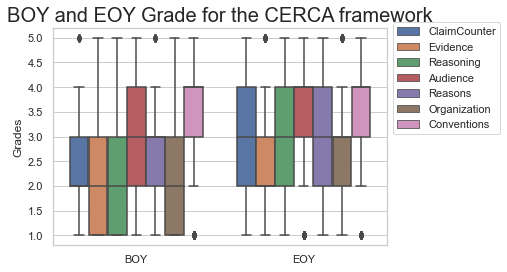

In [22]:
sns.set_theme(style="whitegrid")
# sns.boxplot(df_box['subtype'],df_box['Organization'],width=0.5)
sns.boxplot(x="subtype", y="value", hue="CERCA", data=new_df_box, width=0.8)
plt.xlabel('')
plt.ylabel('Grades')
plt.title("BOY and EOY Grade for the CERCA framework", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1.05))
rcParams['figure.figsize'] = 12,8
plt.show()

In [23]:
# load dataset
# tips = sns.load_dataset("tips")
# tips

In [24]:
# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
# total = tips.groupby('day')['total_bill'].sum().reset_index()
# total

In [25]:
# # set plot style: grey grid in the background:
# sns.set(style="darkgrid")

# # set the figure size
# plt.figure(figsize=(14, 14))

# # bar chart 1 -> top bars (group of 'smoker=No')
# bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# # bottom bar ->  take only smoker=Yes values from the data
# smoker = tips[tips.smoker=='Yes']

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# # add legend
# top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# plt.show()

In [26]:
# id is assignment id?
df_bar = new_df_box.groupby(['CERCA','subtype']).size().reset_index()
df_bar.rename(columns = {0:'num_asgm'}, inplace=True)
df_bar

,CERCA,subtype,num_asgm
0,Audience,BOY,502
1,Audience,EOY,540
2,ClaimCounter,BOY,502
3,ClaimCounter,EOY,540
4,Conventions,BOY,502
5,Conventions,EOY,540
6,Evidence,BOY,1004
7,Evidence,EOY,1080
8,Organization,BOY,502
9,Organization,EOY,540


In [27]:
grade1 = new_df_box[new_df_box.value==1.0]
grade1 = grade1.groupby(["CERCA","subtype"]).size().reset_index()
grade1.rename(columns = {0:'num_asgm'}, inplace=True)

grade2 = new_df_box[new_df_box['value'].isin([2.0, 1.0])]
grade3 = new_df_box[new_df_box['value'].isin([3.0, 2.0, 1.0])]
grade4 = new_df_box[new_df_box['value'].isin([4.0, 3.0, 2.0, 1.0])]

In [28]:
df_bar2 = new_df_box.groupby(['CERCA','subtype','value']).size().reset_index()
df_bar2.rename(columns = {0:'num_asgm'}, inplace=True)

In [29]:
df_bar2['Percentage'] = df_bar2['num_asgm'] / df_bar2.groupby(['CERCA','subtype'])['num_asgm'].transform('sum')

In [30]:
df_bar2['total'] = 1

In [31]:
# df_bar2['Percentage'] = df_bar2['Percentage'].astype(float).map("{:.2%}".format)

In [32]:
df_bar2.dtypes

CERCA          object
subtype        object
value         float64
num_asgm        int64
Percentage    float64
total           int64
dtype: object

In [33]:
grade1 = df_bar2[df_bar2['value'].isin([1.0])]
grade1.drop('num_asgm',axis=1,inplace=True)
grade1.drop('total',axis=1,inplace=True)

In [34]:
grade1

,CERCA,subtype,value,Percentage
0,Audience,BOY,1.0,0.163347
5,Audience,EOY,1.0,0.083333
10,ClaimCounter,BOY,1.0,0.097610
15,ClaimCounter,EOY,1.0,0.048148
20,Conventions,BOY,1.0,0.080000
25,Conventions,EOY,1.0,0.044444
30,Evidence,BOY,1.0,0.278884
35,Evidence,EOY,1.0,0.244444
40,Organization,BOY,1.0,0.300797
45,Organization,EOY,1.0,0.172222


In [35]:
grade2 = df_bar2[df_bar2['value']==2.0]
grade2.drop(['num_asgm','total'],axis=1,inplace=True)

In [36]:
grade2 = pd.merge(grade2, grade1, on=['CERCA','subtype'], how = 'inner')

In [37]:
grade2["Percentage"] = grade2["Percentage_x"] + grade2["Percentage_y"]

In [38]:
grade2.drop(['Percentage_x','value_y','Percentage_y'],axis=1,inplace=True)

In [39]:
grade2

,CERCA,subtype,value_x,Percentage
0,Audience,BOY,2.0,0.292829
1,Audience,EOY,2.0,0.190741
2,ClaimCounter,BOY,2.0,0.651394
3,ClaimCounter,EOY,2.0,0.433333
4,Conventions,BOY,2.0,0.174000
5,Conventions,EOY,2.0,0.111111
6,Evidence,BOY,2.0,0.677291
7,Evidence,EOY,2.0,0.570370
8,Organization,BOY,2.0,0.677291
9,Organization,EOY,2.0,0.444444


In [40]:
grade3 = df_bar2[df_bar2['value']==3.0]
grade3.drop(['num_asgm','total'],axis=1,inplace=True)
grade3 = pd.merge(grade3, grade2, on=['CERCA','subtype'], how = 'inner')
grade3["Percentage"] = grade3["Percentage_x"] + grade3["Percentage_y"]
grade3.drop(['Percentage_x','value_x','Percentage_y'],axis=1,inplace=True)
grade3

,CERCA,subtype,value,Percentage
0,Audience,BOY,3.0,0.555777
1,Audience,EOY,3.0,0.487037
2,ClaimCounter,BOY,3.0,0.818725
3,ClaimCounter,EOY,3.0,0.674074
4,Conventions,BOY,3.0,0.362000
5,Conventions,EOY,3.0,0.279630
6,Evidence,BOY,3.0,0.942231
7,Evidence,EOY,3.0,0.874074
8,Organization,BOY,3.0,0.912351
9,Organization,EOY,3.0,0.770370


In [41]:
grade4 = df_bar2[df_bar2['value']==4.0]
grade4.drop(['num_asgm','total'],axis=1,inplace=True)
grade4 = pd.merge(grade4, grade3, on=['CERCA','subtype'], how = 'inner')
grade4["Percentage"] = grade4["Percentage_x"] + grade4["Percentage_y"]
grade4.drop(['Percentage_x','value_y','Percentage_y'],axis=1,inplace=True)
grade4

,CERCA,subtype,value_x,Percentage
0,Audience,BOY,4.0,0.916335
1,Audience,EOY,4.0,0.829630
2,ClaimCounter,BOY,4.0,0.982072
3,ClaimCounter,EOY,4.0,0.951852
4,Conventions,BOY,4.0,0.888000
5,Conventions,EOY,4.0,0.812963
6,Evidence,BOY,4.0,0.990040
7,Evidence,EOY,4.0,0.979630
8,Organization,BOY,4.0,0.994024
9,Organization,EOY,4.0,0.959259


In [42]:
df_bar2

,CERCA,subtype,value,num_asgm,Percentage,total
0,Audience,BOY,1.0,82,0.163347,1
1,Audience,BOY,2.0,65,0.129482,1
2,Audience,BOY,3.0,132,0.262948,1
3,Audience,BOY,4.0,181,0.360558,1
4,Audience,BOY,5.0,42,0.083665,1
...,...,...,...,...,...,...
65,Reasons,EOY,1.0,47,0.087037,1
66,Reasons,EOY,2.0,115,0.212963,1
67,Reasons,EOY,3.0,216,0.400000,1
68,Reasons,EOY,4.0,134,0.248148,1


In [43]:
df_bar2[df_bar2['value']==5.0]

,CERCA,subtype,value,num_asgm,Percentage,total
4,Audience,BOY,5.0,42,0.083665,1
9,Audience,EOY,5.0,92,0.170370,1
14,ClaimCounter,BOY,5.0,9,0.017928,1
19,ClaimCounter,EOY,5.0,26,0.048148,1
24,Conventions,BOY,5.0,56,0.112000,1
29,Conventions,EOY,5.0,101,0.187037,1
34,Evidence,BOY,5.0,10,0.009960,1
39,Evidence,EOY,5.0,22,0.020370,1
44,Organization,BOY,5.0,3,0.005976,1
49,Organization,EOY,5.0,22,0.040741,1


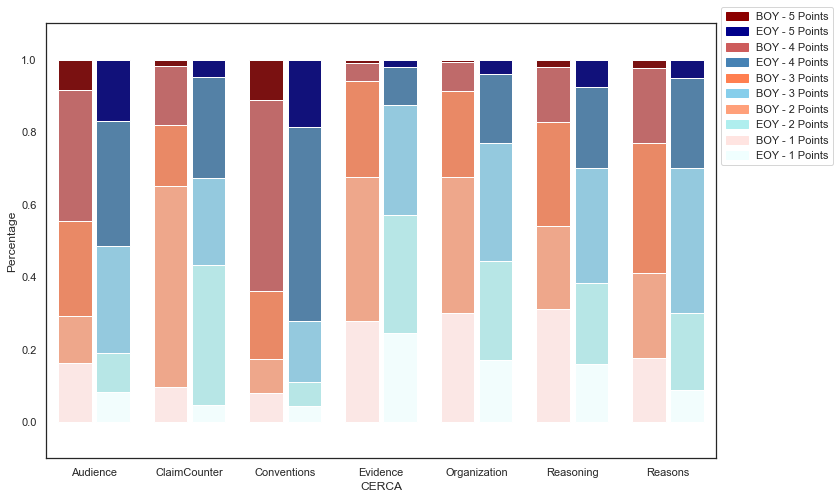

In [44]:
# set plot style: grey grid in the background:
sns.set(style="white")

# set the figure size
fig, ax = plt.subplots(figsize=(12,8))

# bar chart 1 -> top bars
bar1 = sns.barplot(x="CERCA",  y="total", hue="subtype",data=df_bar2,
                   palette={'EOY':'darkblue','BOY':'darkred'},ci=None)

# bar chart 2 -> bottom bars (group of grade = 4)
bar2 = sns.barplot(x="CERCA",  y="Percentage", hue="subtype", data=grade4, ci=None,
                   palette={'EOY':'steelblue','BOY':'indianred'})

bar3 = sns.barplot(x="CERCA",  y="Percentage", hue="subtype", data=grade3, ci=None,
                   palette={'EOY':'skyblue','BOY':'coral'})
bar4 = sns.barplot(x="CERCA",  y="Percentage", hue="subtype", data=grade2, ci=None,
                   palette={'EOY':'paleturquoise','BOY':'lightsalmon'})
bar5 = sns.barplot(x="CERCA",  y="Percentage", hue="subtype", data=grade1, ci=None,
                   palette={'EOY':'azure','BOY':'mistyrose'})
# add legend
a = mpatches.Patch(color='darkred', label='BOY - 5 Points')
b = mpatches.Patch(color='darkblue', label='EOY - 5 Points')
c = mpatches.Patch(color='indianred', label='BOY - 4 Points')
d = mpatches.Patch(color='steelblue', label='EOY - 4 Points')
e = mpatches.Patch(color='coral', label='BOY - 3 Points')
f = mpatches.Patch(color='skyblue', label='BOY - 3 Points')
g = mpatches.Patch(color='lightsalmon', label='BOY - 2 Points')
h = mpatches.Patch(color='paleturquoise', label='EOY - 2 Points')
i = mpatches.Patch(color='mistyrose', label='BOY - 1 Points')
j = mpatches.Patch(color='azure', label='EOY - 1 Points')
plt.legend(handles=[a,b,c,d,e,f,g,h,i,j], bbox_to_anchor=(1, 1.05))

ax.set(ylim=(-0.1, 1.1))

# change the width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

# show the graph
plt.show()

In [45]:
def rearrange(df_name, grade_value):
    df_name = new_df_box[new_df_box['value'].isin(grade_value)]
    df_name = df_name.groupby(["CERCA","subtype"]).size().reset_index()
    df_name.rename(columns = {0:'num_asgm'}, inplace=True)
#     df_name['Percentage'] = df_name['num_asgm'] / df_name.groupby(['CERCA','subtype'])['num_asgm'].transform('sum')
    return df_name

In [46]:
# # bottom bar 
grade1 = rearrange("grade1", [1.0])
grade2 = rearrange("grade2", [1.0, 2.0])
grade3 = rearrange("grade3", [3.0, 2.0, 1.0])
grade4 = rearrange("grade4", [4.0, 3.0, 2.0, 1.0])

In [47]:
grade2

,CERCA,subtype,num_asgm
0,Audience,BOY,147
1,Audience,EOY,103
2,ClaimCounter,BOY,327
3,ClaimCounter,EOY,234
4,Conventions,BOY,87
5,Conventions,EOY,60
6,Evidence,BOY,680
7,Evidence,EOY,616
8,Organization,BOY,340
9,Organization,EOY,240


In [48]:
df_bar

,CERCA,subtype,num_asgm
0,Audience,BOY,502
1,Audience,EOY,540
2,ClaimCounter,BOY,502
3,ClaimCounter,EOY,540
4,Conventions,BOY,502
5,Conventions,EOY,540
6,Evidence,BOY,1004
7,Evidence,EOY,1080
8,Organization,BOY,502
9,Organization,EOY,540


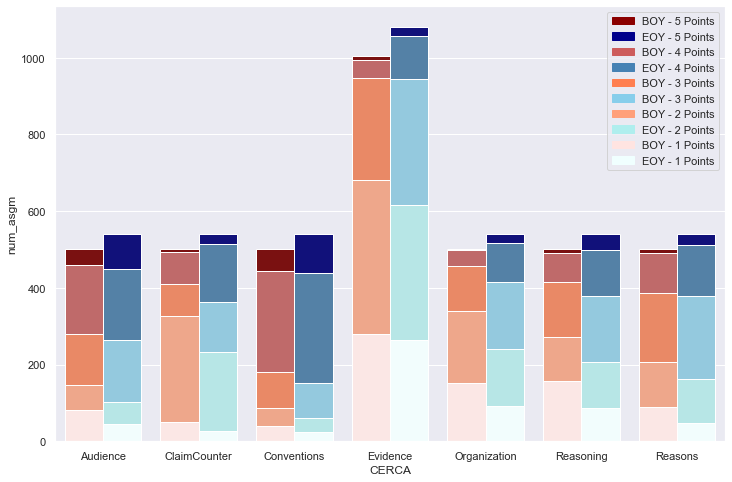

In [49]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
fig, ax = plt.subplots(figsize=(12,8))
# df_pivot = pd.pivot_table(df_bar, index=('CERCA','subtype'), columns='grade', values='num_asgm', aggfunc='sum')
# df_pivot.plot(kind='bar',stacked=True)

# bar chart 1 -> top bars
bar1 = sns.barplot(x="CERCA",  y="num_asgm", hue="subtype",data=df_bar, ax=ax,
                   palette={'EOY':'darkblue','BOY':'darkred'},ci=None)

# bar chart 2 -> bottom bars (group of grade = 4)
bar2 = sns.barplot(x="CERCA",  y="num_asgm", hue="subtype", data=grade4, ci=None, ax=ax, 
                   palette={'EOY':'steelblue','BOY':'indianred'})

bar3 = sns.barplot(x="CERCA",  y="num_asgm", hue="subtype", data=grade3, ci=None, ax=ax,
                   palette={'EOY':'skyblue','BOY':'coral'})
bar4 = sns.barplot(x="CERCA",  y="num_asgm", hue="subtype", data=grade2, ci=None,ax=ax,  
                   palette={'EOY':'paleturquoise','BOY':'lightsalmon'})
bar5 = sns.barplot(x="CERCA",  y="num_asgm", hue="subtype", data=grade1, ci=None,ax=ax,  
                   palette={'EOY':'azure','BOY':'mistyrose'})
# add legend
a = mpatches.Patch(color='darkred', label='BOY - 5 Points')
b = mpatches.Patch(color='darkblue', label='EOY - 5 Points')
c = mpatches.Patch(color='indianred', label='BOY - 4 Points')
d = mpatches.Patch(color='steelblue', label='EOY - 4 Points')
e = mpatches.Patch(color='coral', label='BOY - 3 Points')
f = mpatches.Patch(color='skyblue', label='BOY - 3 Points')
g = mpatches.Patch(color='lightsalmon', label='BOY - 2 Points')
h = mpatches.Patch(color='paleturquoise', label='EOY - 2 Points')
i = mpatches.Patch(color='mistyrose', label='BOY - 1 Points')
j = mpatches.Patch(color='azure', label='EOY - 1 Points')
plt.legend(handles=[a,b,c,d,e,f,g,h,i,j])

# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

# # show the graph
plt.show()

In [50]:
# def show_values_on_bars(axs):
#     def _show_on_single_plot(ax):        
#         for p in ax.patches:
#             _x = p.get_x() + p.get_width() / 2
#             _y = p.get_y() + p.get_height()
#             value = '{:.2f}'.format(p.get_height())
#             ax.text(_x, _y, value, ha="center") 

#     if isinstance(axs, np.ndarray):
#         for idx, ax in np.ndenumerate(axs):
#             _show_on_single_plot(ax)
#     else:
#         _show_on_single_plot(axs)

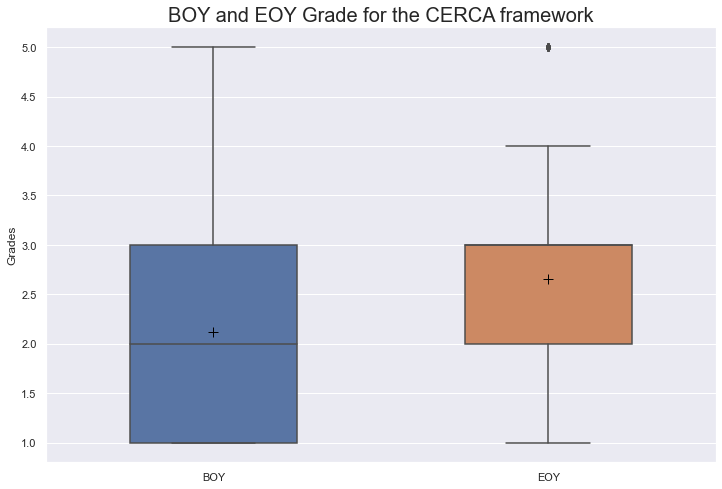

In [51]:
sns.boxplot(df_box['subtype'],df_box['Organization'],width=0.5, showmeans=True, 
            meanprops={"marker":"+","markersize":"10","markeredgecolor":"black"})
# plt.plot([], [], ' ', label="Plus sign shows average")
plt.xlabel('')
plt.ylabel('Grades')
plt.title("BOY and EOY Grade for the CERCA framework", fontsize=20)
# plt.legend(bbox_to_anchor=(1.1, 1.05),prop={'size': 15}, edgecolor='white')
# rcParams['figure.figsize'] = 15,10
plt.show()

## Remove Outliers
### maybe I don't need to remove outliers because all of them are natural parts of the population and I only have eight outliers for all the seven categories...

In [52]:
z1 = np.abs(stats.zscore(df_box.loc[df_box['subtype'] == 'BOY', 'Evidence']))
print(z1)

     Evidence  Evidence
546  0.123776  0.123776
590  0.123776  0.123776
592  0.985790  0.985790
594  0.123776  0.123776
596  0.985790  0.985790
..        ...       ...
148  0.985790  0.985790
146  0.123776  0.123776
152  0.985790  0.985790
326  0.985790  0.985790
44   0.123776  0.123776

[502 rows x 2 columns]


In [53]:
threshold = 3
print(np.where(z1 > 3))

(array([ 57,  57, 179, 179, 268, 268, 280, 280, 405, 405]), array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]))


In [54]:
z2 = np.abs(stats.zscore(df_box.loc[df_box['subtype'] == 'BOY', 'Organization']))
print(z2)

546    0.121586
590    0.930762
592    3.035459
594    1.173935
596    0.121586
         ...   
148    0.121586
146    0.121586
152    0.121586
326    0.121586
44     1.173935
Name: Organization, Length: 502, dtype: float64


In [55]:
print(np.where(z2 > 3))

(array([  2,  63, 268]),)


## Data Overview on proficiency

In [56]:
new_df_box

,id,last_updated,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,gradelink,student_writing,CERCA,value
0,14189468,10/30/20,BOY,Stuart Academy,Marybeth Baumann,WKHCPG,Serenity Rogers,8,NaN,"""The biggest threat to them was draining the s...",ClaimCounter,2.0
1,14345779,10/16/20,BOY,Thomas Jefferson Middle,Kendall Madden,TGFB7A,Taeyvion Sewell,8,NaN,"""The bigger threat was the Burmese python beca...",ClaimCounter,2.0
2,14476512,10/1/20,BOY,Crosby Middle,JACOB MAYER,UBRNGW,Taran Whyte,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""The Burmese pythons are the bigger threat tha...",ClaimCounter,5.0
3,14345170,10/9/20,BOY,Thomas Jefferson Middle,Korinne Dunn,CVRUYQ,Tessa Eldridge,8,NaN,"""draining the swap because if the swap got dra...",ClaimCounter,2.0
4,14568855,10/15/20,BOY,Crosby Middle,Brenda Gunnell,NPHTLW,Thomas Weber,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""The Burmese Python is a bigger threat to the ...",ClaimCounter,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,15675951,5/17/21,EOY,Crosby Middle,JACOB MAYER,KAY9NA,Zuchriya Afzaal,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""I think schools should move to a year round s...",Conventions,5.0
8332,15703127,5/25/21,EOY,Engelhard Elementary,EVELYN NICHOLSON,7QHN7A,Andre Martin,4,"""Your answer is not related to the writing pro...","""Schools are as good thing for kids some kids ...",Conventions,4.0
8333,15728605,5/24/21,EOY,Engelhard Elementary,Amy Anderson,E8UK5A,Braedon Sweeney,4,NaN,"""if it is true that research benefits healthy ...",Conventions,4.0
8334,15676056,5/4/21,EOY,Crosby Middle,JACOB MAYER,E4A9UQ,Zechariah James,8,https://learn.thinkcerca.com/teacher/lesson_as...,"""no because the students have been working or ...",Conventions,3.0


In [57]:
G = new_df_box.groupby(['subtype','value']).size().reset_index(name='counts')
G.loc[G['subtype']=='BOY','Percentage'] = 100 * G['counts']  / G.loc[G['subtype']=='BOY','counts'].sum()
G.loc[G['subtype']=='EOY','Percentage'] = 100 * G['counts']  / G.loc[G['subtype']=='EOY','counts'].sum()
G

,subtype,value,counts,Percentage
0,BOY,1.0,847,21.106404
1,BOY,2.0,1211,30.176925
2,BOY,3.0,1019,25.392474
3,BOY,4.0,794,19.785696
4,BOY,5.0,142,3.538500
5,EOY,1.0,586,13.567956
6,EOY,2.0,1036,23.987034
7,EOY,3.0,1272,29.451262
8,EOY,4.0,1094,25.329937
9,EOY,5.0,331,7.663811


In [58]:
G1 = new_df_box.groupby(['CERCA','value']).size().reset_index(name='counts')

In [59]:
G1

,CERCA,value,counts
0,Audience,1.0,127
1,Audience,2.0,123
2,Audience,3.0,292
3,Audience,4.0,366
4,Audience,5.0,134
5,ClaimCounter,1.0,75
6,ClaimCounter,2.0,486
7,ClaimCounter,3.0,214
8,ClaimCounter,4.0,232
9,ClaimCounter,5.0,35


### Plot normal distribution

#### normal distribution can be misleading? because it might suggest that score 5, 6, 7 all have values???

In [60]:
plt.style.use('ggplot')

In [61]:
# counter claim

In [62]:
mcc1 = df_box.loc[df_box['subtype'] == 'BOY', 'ClaimCounter'].mean()
mcc2 = df_box.loc[df_box['subtype'] == 'EOY', 'ClaimCounter'].mean()
stcc1 = df_box.loc[df_box['subtype'] == 'BOY', 'ClaimCounter'].std()
stcc2 = df_box.loc[df_box['subtype'] == 'EOY', 'ClaimCounter'].std()

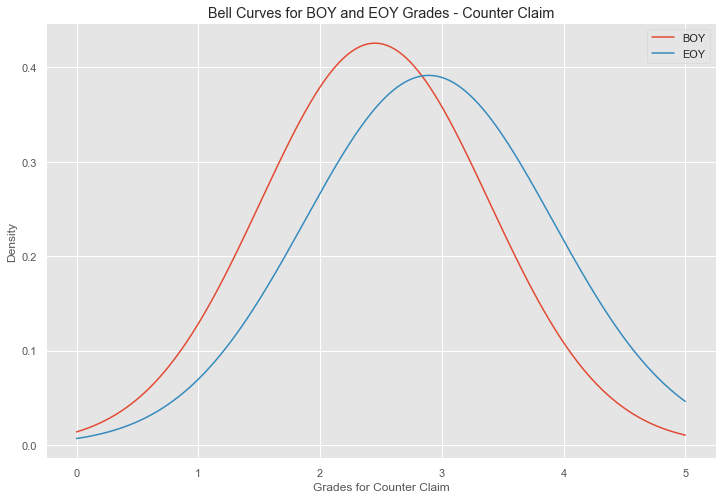

In [63]:
x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mcc1,stcc1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mcc2,stcc2), label = 'EOY')
plt.xlabel("Grades for Counter Claim")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Counter Claim")
plt.legend()
plt.show()

In [64]:
# reasons

In [65]:
mr1 = df_box.loc[df_box['subtype'] == 'BOY', 'Reasons'].mean()
mr2 = df_box.loc[df_box['subtype'] == 'EOY', 'Reasons'].mean()
str1 = df_box.loc[df_box['subtype'] == 'BOY', 'Reasons'].std()
str2 = df_box.loc[df_box['subtype'] == 'EOY', 'Reasons'].std()

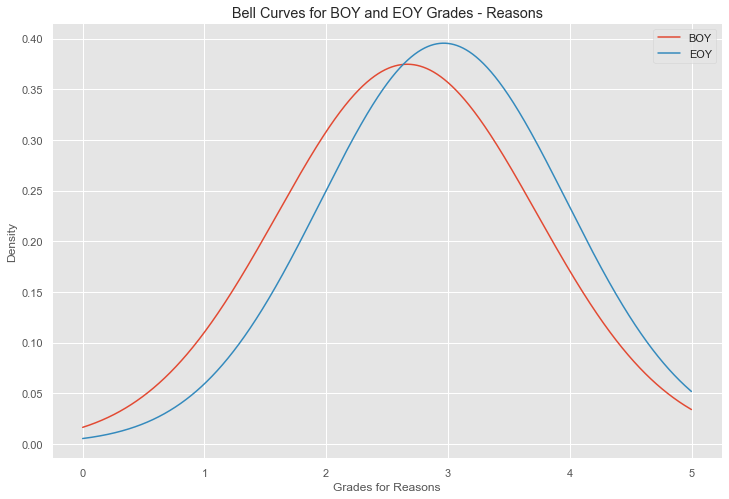

In [66]:
x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mr1,str1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mr2,str2), label = 'EOY')
plt.xlabel("Grades for Reasons")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Reasons")
plt.legend()
plt.show()

In [67]:
# evidence 

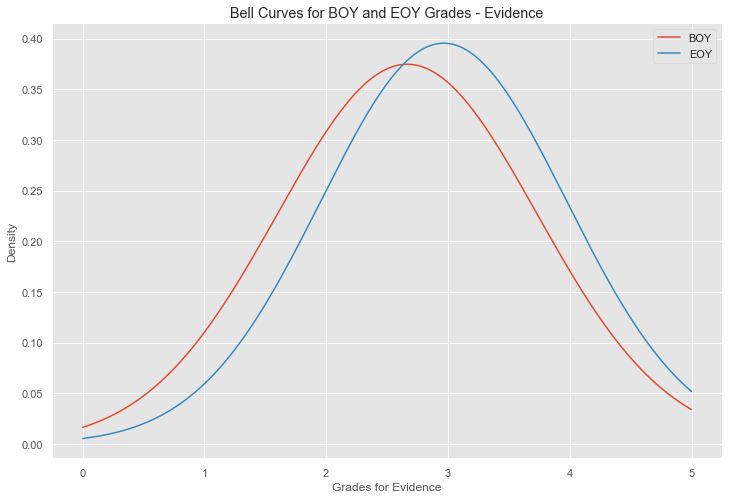

In [68]:
me1 = df_box.loc[df_box['subtype'] == 'BOY', 'Evidence'].mean()
me2 = df_box.loc[df_box['subtype'] == 'EOY', 'Evidence'].mean()
ste1 = df_box.loc[df_box['subtype'] == 'BOY', 'Evidence'].std()
ste2 = df_box.loc[df_box['subtype'] == 'EOY', 'Evidence'].std()

x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mr1,str1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mr2,str2), label = 'EOY')
plt.xlabel("Grades for Evidence")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Evidence")
plt.legend()
plt.show()

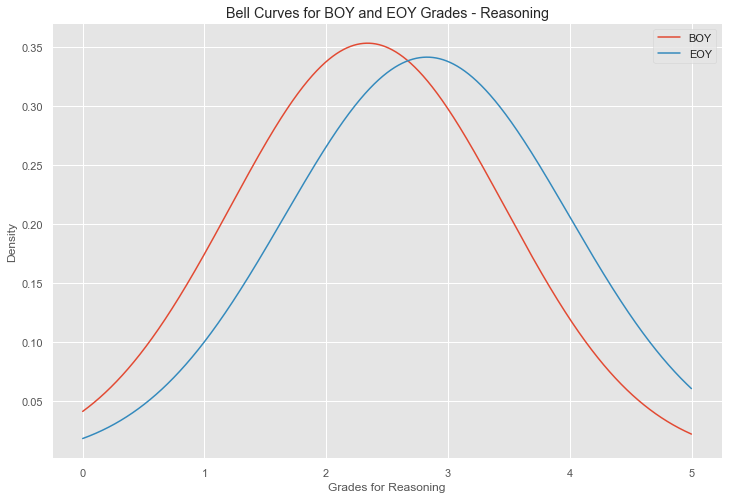

In [69]:
# reasoning
mrg1 = df_box.loc[df_box['subtype'] == 'BOY', 'Reasoning'].mean()
mrg2 = df_box.loc[df_box['subtype'] == 'EOY', 'Reasoning'].mean()
strg1 = df_box.loc[df_box['subtype'] == 'BOY', 'Reasoning'].std()
strg2 = df_box.loc[df_box['subtype'] == 'EOY', 'Reasoning'].std()

x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mrg1,strg1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mrg2,strg2), label = 'EOY')
plt.xlabel("Grades for Reasoning")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Reasoning")
plt.legend()
plt.show()

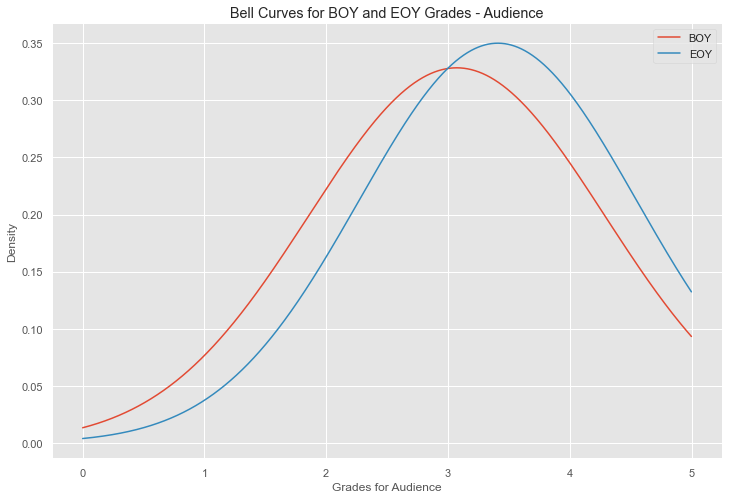

In [70]:
# Audience
ma1 = df_box.loc[df_box['subtype'] == 'BOY', 'Audience'].mean()
ma2 = df_box.loc[df_box['subtype'] == 'EOY', 'Audience'].mean()
sta1 = df_box.loc[df_box['subtype'] == 'BOY', 'Audience'].std()
sta2 = df_box.loc[df_box['subtype'] == 'EOY', 'Audience'].std()

x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,ma1,sta1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,ma2,sta2), label = 'EOY')
plt.xlabel("Grades for Audience")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Audience")
plt.legend()
plt.show()

In [71]:
# organization
mo1 = df_box.loc[df_box['subtype'] == 'BOY', 'Organization'].mean()
mo2 = df_box.loc[df_box['subtype'] == 'EOY', 'Organization'].mean()
sto1 = df_box.loc[df_box['subtype'] == 'BOY', 'Organization'].std()
sto2 = df_box.loc[df_box['subtype'] == 'EOY', 'Organization'].std()

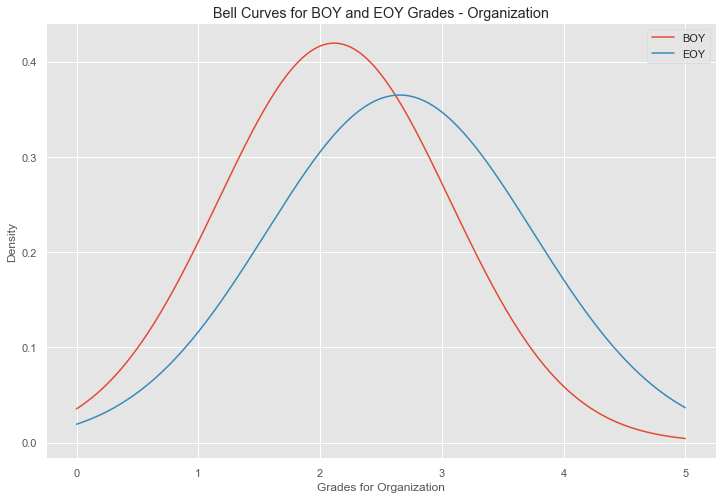

In [72]:
x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mo1,sto1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mo2,sto2), label = 'EOY')
plt.xlabel("Grades for Organization")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Organization")
plt.legend()
plt.show()

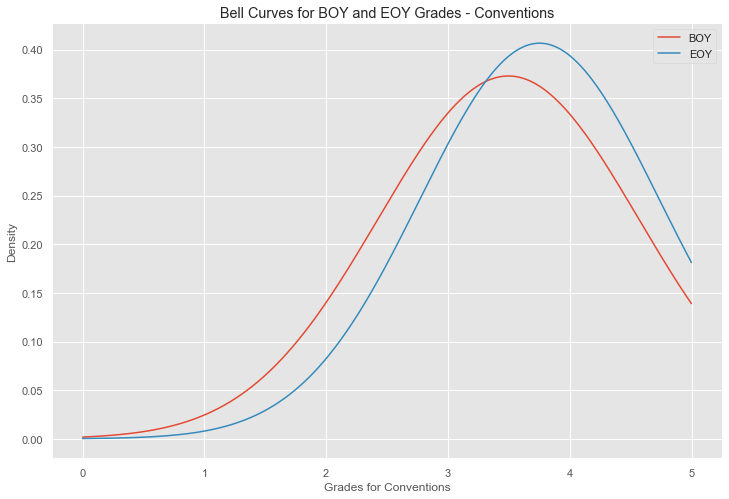

In [73]:
# Conventions
mc1 = df_box.loc[df_box['subtype'] == 'BOY', 'Conventions'].mean()
mc2 = df_box.loc[df_box['subtype'] == 'EOY', 'Conventions'].mean()
stc1 = df_box.loc[df_box['subtype'] == 'BOY', 'Conventions'].std()
stc2 = df_box.loc[df_box['subtype'] == 'EOY', 'Conventions'].std()

x_axis = np.arange(0, 5, 0.001)
# first Mean, second SD
plt.plot(x_axis, norm.pdf(x_axis,mc1,stc1), label = 'BOY')
plt.plot(x_axis, norm.pdf(x_axis,mc2,stc2), label = 'EOY')
plt.xlabel("Grades for Conventions")
plt.ylabel("Density")
plt.title("Bell Curves for BOY and EOY Grades - Conventions")
plt.legend()
plt.show()

## Histogram

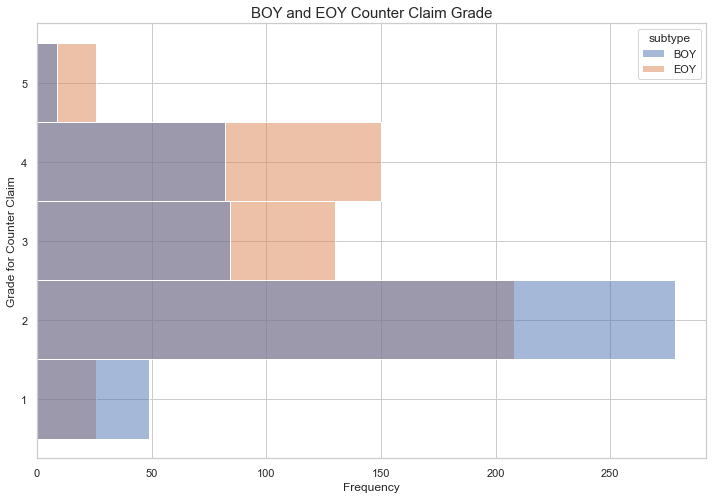

In [74]:
#counter claim
sns.set_theme(style="whitegrid")
sns.histplot(data = df_box, y='ClaimCounter',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Counter Claim')
plt.title("BOY and EOY Counter Claim Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

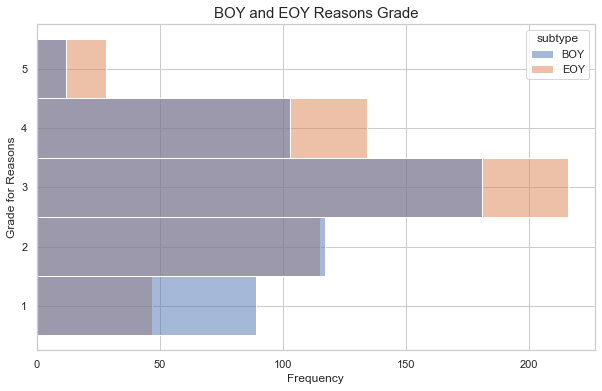

In [75]:
#Reasons
sns.histplot(data = df_box, y='Reasons',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Reasons')
plt.title("BOY and EOY Reasons Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

In [76]:
# #Evidence
# sns.histplot(data = df_box, y='Evidence',discrete=True,hue='subtype')
# plt.xlabel('Frequency')
# plt.ylabel('Grade for Evidence')
# plt.title("BOY and EOY Evidence Grade", fontsize=15)
# rcParams['figure.figsize'] = 10,6
# plt.show()

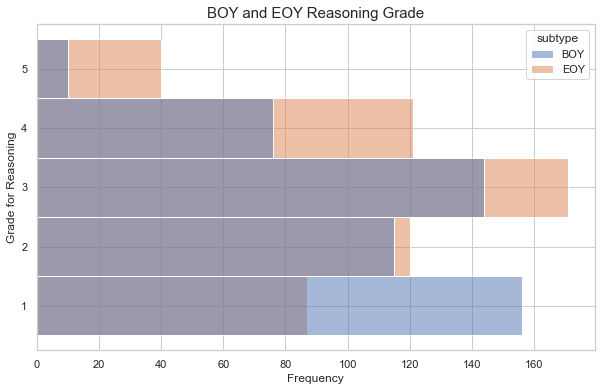

In [77]:
#Reasoning
sns.histplot(data = df_box, y='Reasoning',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Reasoning')
plt.title("BOY and EOY Reasoning Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

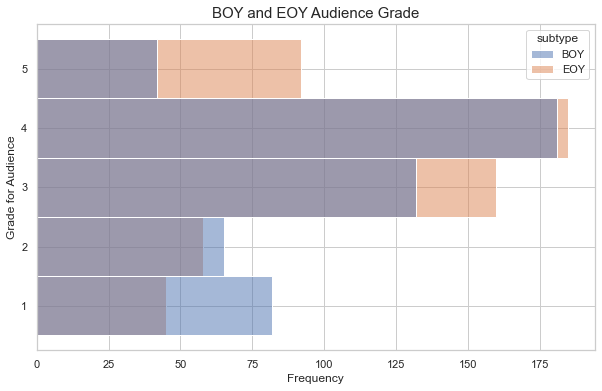

In [78]:
#Audience
sns.histplot(data = df_box, y='Audience',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Audience')
plt.title("BOY and EOY Audience Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

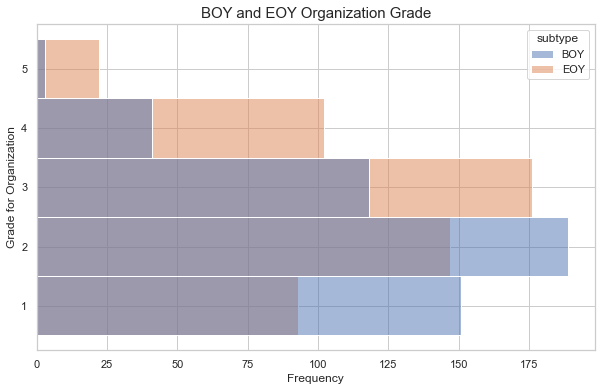

In [79]:
#organization
sns.histplot(data = df_box, y='Organization',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Organization')
plt.title("BOY and EOY Organization Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

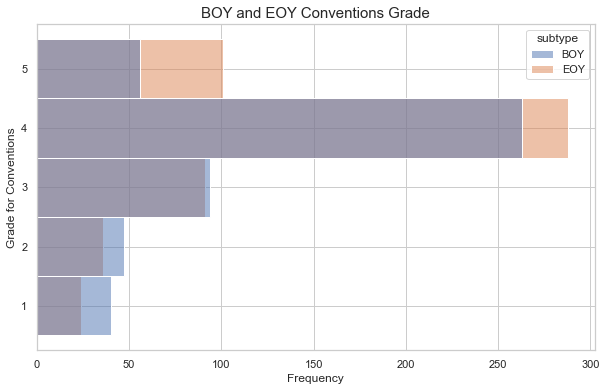

In [80]:
#Conventions
sns.histplot(data = df_box, y='Conventions',discrete=True,hue='subtype')
plt.xlabel('Frequency')
plt.ylabel('Grade for Conventions')
plt.title("BOY and EOY Conventions Grade", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

### b. regression

In [81]:
num_asgmt = pd.read_csv(os.path.join(path, 'Student Assignments 2020-2021 School Year.csv'))

In [82]:
num_asgmt = num_asgmt.rename(columns = {'1. Usage and Performance Information Student Id [Sensitive]':'id', 
                                        '1. Usage and Performance Information Full Name [Sensitive]':'student_name', 
                                        'Count of Student Assignment Id':'num_assignments_submitted'}, inplace = False)

In [83]:
num_asgmt

,id,student_name,num_assignments_submitted
0,4498,Viviana Acosta,1
1,4903,Daisy Garcia,3
2,12769,Ariana Wafer,2
3,23006,Hannah Arocho,1
4,27184,Isamar Prado,1
...,...,...,...
87708,1220055,Nicolas Test1,2
87709,1220056,Annalis Test1,1
87710,1220057,Owen Test3,1
87711,1220631,Luis Aguilar,2


In [84]:
df_reg = pd.merge(df_new, num_asgmt, on=['student_name'], how = 'inner')

In [85]:
df_reg['ClaimCounter_diff'] = df_reg['ClaimCounter_y'] - df_reg['ClaimCounter_x']
df_reg['Reasons_diff'] = df_reg['Reasons_y'] - df_reg['Reasons_x']
df_reg['Evidence_diff'] = df_reg['Evidence_y'] - df_reg['Evidence_x']
df_reg['Reasoning_diff'] = df_reg['Reasoning_y'] - df_reg['Reasoning_x']
df_reg['Organization_diff'] = df_reg['Organization_y'] - df_reg['Organization_x']
df_reg['Audience_diff'] = df_reg['Audience_y'] - df_reg['Audience_x']
df_reg['Conventions_diff'] = df_reg['Conventions_y'] - df_reg['Conventions_x']

In [86]:
df_reg

,id_x,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,ClaimCounter_x,Reasons_x,Evidence_x,...,Conventions_y,id_y,num_assignments_submitted,ClaimCounter_diff,Reasons_diff,Evidence_diff,Reasoning_diff,Organization_diff,Audience_diff,Conventions_diff
0,14196305,4,Stuart Academy,Christian Kampschaefer,2SM7CQ,Aaron Anderson,8,2.0,1.0,1.0,...,2.0,1046947,9,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,14476405,4,Crosby Middle,JACOB MAYER,KAY9NA,Aaron Reynolds,8,1.0,2.0,2.0,...,1.0,1042106,3,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0
2,14397398,4,Kammerer Middle,Kimberly Crone,8JTX2A,Aaron Welch,8,3.0,3.0,3.0,...,4.0,1104305,3,1.0,1.0,0.0,1.0,2.0,2.0,1.0
3,14185857,4,Stuart Academy,Dalton Holt,LJ6A7W,Abdalla Hussein,8,1.0,1.0,1.0,...,2.0,1032739,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,14568914,4,Crosby Middle,Brenda Gunnell,MHC2YQ,Abigail Grigsby,8,4.0,4.0,4.0,...,4.0,1023004,4,-3.0,-3.0,-3.0,-1.0,-3.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,14183910,4,Crosby Middle,ANASTASIA BINGHAM,E6XG4A,Charles Rafferty,7,1.0,1.0,1.0,...,2.0,1020879,4,1.0,1.0,0.0,0.0,1.0,0.0,1.0
505,14183396,4,Crosby Middle,ANASTASIA BINGHAM,NLLUPG,Cirene Gomez Villegas,7,2.0,1.0,2.0,...,3.0,1021514,4,2.0,2.0,-1.0,2.0,2.0,2.0,1.0
506,14183492,4,Crosby Middle,ANASTASIA BINGHAM,N5UELW,Clark Gougeon Ball,7,2.0,1.0,1.0,...,2.0,1046430,5,1.0,1.0,0.0,2.0,1.0,2.0,0.0
507,14184022,4,Crosby Middle,ANASTASIA BINGHAM,LSASGQ,Collins Taylor,7,2.0,1.0,1.0,...,2.0,1048239,3,0.0,2.0,0.0,1.0,2.0,2.0,1.0


### Remove Outliers

In [87]:
z = np.abs(stats.zscore(df_reg['ClaimCounter_diff']))
print(z)

0      1.369981
1      0.412123
2      0.545734
3      0.545734
4      3.285695
         ...   
504    0.545734
505    1.503591
506    0.545734
507    0.412123
508    0.412123
Name: ClaimCounter_diff, Length: 509, dtype: float64


In [88]:
threshold = 3
print(np.where(z > 3))

(array([  4, 457]),)


In [89]:
df_reg

,id_x,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,ClaimCounter_x,Reasons_x,Evidence_x,...,Conventions_y,id_y,num_assignments_submitted,ClaimCounter_diff,Reasons_diff,Evidence_diff,Reasoning_diff,Organization_diff,Audience_diff,Conventions_diff
0,14196305,4,Stuart Academy,Christian Kampschaefer,2SM7CQ,Aaron Anderson,8,2.0,1.0,1.0,...,2.0,1046947,9,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,14476405,4,Crosby Middle,JACOB MAYER,KAY9NA,Aaron Reynolds,8,1.0,2.0,2.0,...,1.0,1042106,3,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0
2,14397398,4,Kammerer Middle,Kimberly Crone,8JTX2A,Aaron Welch,8,3.0,3.0,3.0,...,4.0,1104305,3,1.0,1.0,0.0,1.0,2.0,2.0,1.0
3,14185857,4,Stuart Academy,Dalton Holt,LJ6A7W,Abdalla Hussein,8,1.0,1.0,1.0,...,2.0,1032739,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,14568914,4,Crosby Middle,Brenda Gunnell,MHC2YQ,Abigail Grigsby,8,4.0,4.0,4.0,...,4.0,1023004,4,-3.0,-3.0,-3.0,-1.0,-3.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,14183910,4,Crosby Middle,ANASTASIA BINGHAM,E6XG4A,Charles Rafferty,7,1.0,1.0,1.0,...,2.0,1020879,4,1.0,1.0,0.0,0.0,1.0,0.0,1.0
505,14183396,4,Crosby Middle,ANASTASIA BINGHAM,NLLUPG,Cirene Gomez Villegas,7,2.0,1.0,2.0,...,3.0,1021514,4,2.0,2.0,-1.0,2.0,2.0,2.0,1.0
506,14183492,4,Crosby Middle,ANASTASIA BINGHAM,N5UELW,Clark Gougeon Ball,7,2.0,1.0,1.0,...,2.0,1046430,5,1.0,1.0,0.0,2.0,1.0,2.0,0.0
507,14184022,4,Crosby Middle,ANASTASIA BINGHAM,LSASGQ,Collins Taylor,7,2.0,1.0,1.0,...,2.0,1048239,3,0.0,2.0,0.0,1.0,2.0,2.0,1.0


In [142]:
df_a = df_reg[df_reg["num_assignments_submitted"]>=10]

In [143]:
df_b = df_reg[df_reg["num_assignments_submitted"]<10]

In [144]:
df_a["ClaimCounter_diff"].describe()

count    21.000000
mean      0.571429
std       0.925820
min      -1.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000
Name: ClaimCounter_diff, dtype: float64

In [146]:
df_b["ClaimCounter_diff"].describe()

count    485.000000
mean       0.416495
std        1.044335
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ClaimCounter_diff, dtype: float64

In [90]:
plt.style.use('bmh')

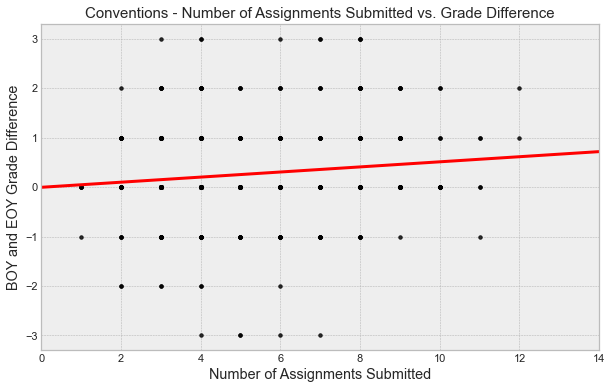

In [91]:
#Evidence
fig, ax = plt.subplots()

xlim = [0,14]
ax.set_xlim(xlim)

sns.regplot(df_reg['num_assignments_submitted'],df_reg['Conventions_diff'],
            scatter_kws={"color": "black",'s':12}, truncate = False,
            line_kws={"color": "red"}, ci=None, ax=ax)
plt.xlabel('Number of Assignments Submitted')
plt.ylabel('BOY and EOY Grade Difference')
plt.title("Conventions - Number of Assignments Submitted vs. Grade Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.show()

In [92]:
df_reg.columns

Index(['id_x', 'subtype', 'school_name', 'primary_teacher_name', 'class_code',
       'student_name', 'student_grade_level', 'ClaimCounter_x', 'Reasons_x',
       'Evidence_x', 'Reasoning_x', 'Organization_x', 'Audience_x',
       'Conventions_x', 'ClaimCounter_y', 'Reasons_y', 'Evidence_y',
       'Reasoning_y', 'Organization_y', 'Audience_y', 'Conventions_y', 'id_y',
       'num_assignments_submitted', 'ClaimCounter_diff', 'Reasons_diff',
       'Evidence_diff', 'Reasoning_diff', 'Organization_diff', 'Audience_diff',
       'Conventions_diff'],
      dtype='object')

In [93]:
# conventions, claimcounter, reasons, reasoning, audience, organization, evidence are all significant
results = smf.ols('Evidence_diff ~ num_assignments_submitted + C(student_grade_level)', data=df_reg).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Evidence_diff   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.181
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           1.66e-06
Time:                        13:42:00   Log-Likelihood:                -714.77
No. Observations:                 509   AIC:                             1442.
Df Residuals:                     503   BIC:                             1467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Random Forest Regression

### counter claim

In [94]:
df_reg = df_reg[df_reg['Conventions_diff'].notna()]
df_reg = df_reg[df_reg['Reasoning_diff'].notna()]

X_rf = pd.get_dummies(df_reg[["school_name","primary_teacher_name","class_code",
                              "student_name","num_assignments_submitted", "student_grade_level"]])

X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['ClaimCounter_diff'],
                                                    test_size=0.2)

In [95]:
df_reg

,id_x,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,ClaimCounter_x,Reasons_x,Evidence_x,...,Conventions_y,id_y,num_assignments_submitted,ClaimCounter_diff,Reasons_diff,Evidence_diff,Reasoning_diff,Organization_diff,Audience_diff,Conventions_diff
0,14196305,4,Stuart Academy,Christian Kampschaefer,2SM7CQ,Aaron Anderson,8,2.0,1.0,1.0,...,2.0,1046947,9,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0
1,14476405,4,Crosby Middle,JACOB MAYER,KAY9NA,Aaron Reynolds,8,1.0,2.0,2.0,...,1.0,1042106,3,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0
2,14397398,4,Kammerer Middle,Kimberly Crone,8JTX2A,Aaron Welch,8,3.0,3.0,3.0,...,4.0,1104305,3,1.0,1.0,0.0,1.0,2.0,2.0,1.0
3,14185857,4,Stuart Academy,Dalton Holt,LJ6A7W,Abdalla Hussein,8,1.0,1.0,1.0,...,2.0,1032739,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0
4,14568914,4,Crosby Middle,Brenda Gunnell,MHC2YQ,Abigail Grigsby,8,4.0,4.0,4.0,...,4.0,1023004,4,-3.0,-3.0,-3.0,-1.0,-3.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,14183910,4,Crosby Middle,ANASTASIA BINGHAM,E6XG4A,Charles Rafferty,7,1.0,1.0,1.0,...,2.0,1020879,4,1.0,1.0,0.0,0.0,1.0,0.0,1.0
505,14183396,4,Crosby Middle,ANASTASIA BINGHAM,NLLUPG,Cirene Gomez Villegas,7,2.0,1.0,2.0,...,3.0,1021514,4,2.0,2.0,-1.0,2.0,2.0,2.0,1.0
506,14183492,4,Crosby Middle,ANASTASIA BINGHAM,N5UELW,Clark Gougeon Ball,7,2.0,1.0,1.0,...,2.0,1046430,5,1.0,1.0,0.0,2.0,1.0,2.0,0.0
507,14184022,4,Crosby Middle,ANASTASIA BINGHAM,LSASGQ,Collins Taylor,7,2.0,1.0,1.0,...,2.0,1048239,3,0.0,2.0,0.0,1.0,2.0,2.0,1.0


In [96]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

# a negative score shows that the mean of the data provides a better fit to the outcomes than do the fitted function values

0.36415727918683105
0.8730361678680401
1.080491308776811
0.03455455713913691


In [97]:
df_reg['num_assignments_submitted'].describe()

count    506.000000
mean       5.185771
std        2.379174
min        1.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       12.000000
Name: num_assignments_submitted, dtype: float64

In [98]:
np.random.seed(50)
random_asgmt = np.random.normal(loc=15.185771, scale=2.379174, size=506)

In [99]:
pd.Series(random_asgmt).head()

0    11.473422
1    15.112070
2    13.708474
3    11.701279
4    18.545037
dtype: float64

In [100]:
df_reg['num_assignments_submitted_hypothetical'] = random_asgmt

In [101]:
X_pred =pd.get_dummies(df_reg[["school_name","primary_teacher_name","class_code",
                              "student_name","num_assignments_submitted_hypothetical", "student_grade_level"]])

In [102]:
pred_hypo_rf = model_rf.predict(X_pred)

In [103]:
pd.Series(pred_hypo_rf).describe()

count    506.000000
mean       0.410719
std        0.603956
min       -1.858000
25%        0.134000
50%        0.207000
75%        0.674500
max        2.522000
dtype: float64

In [104]:
pd.Series(y_train).describe()

count    404.000000
mean       0.413366
std        1.023263
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ClaimCounter_diff, dtype: float64

In [105]:
pd.Series(y_test).describe()

count    102.000000
mean       0.460784
std        1.105088
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ClaimCounter_diff, dtype: float64

In [106]:
df_reg['ClaimCounter_diff_prediction'] = pd.Series(pred_hypo_rf)

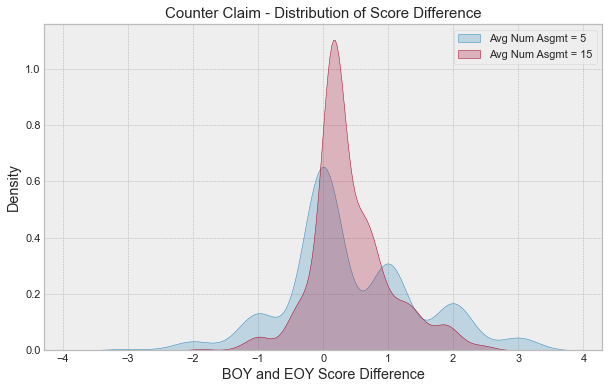

In [107]:
plt.style.use('bmh')
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['ClaimCounter_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['ClaimCounter_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Counter Claim - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

In [108]:
print(df_reg['ClaimCounter_diff_prediction'].describe())
print(df_reg['ClaimCounter_diff'].describe())

count    503.000000
mean       0.411029
std        0.605508
min       -1.858000
25%        0.134000
50%        0.206000
75%        0.677000
max        2.522000
Name: ClaimCounter_diff_prediction, dtype: float64
count    506.000000
mean       0.422925
std        1.039320
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ClaimCounter_diff, dtype: float64


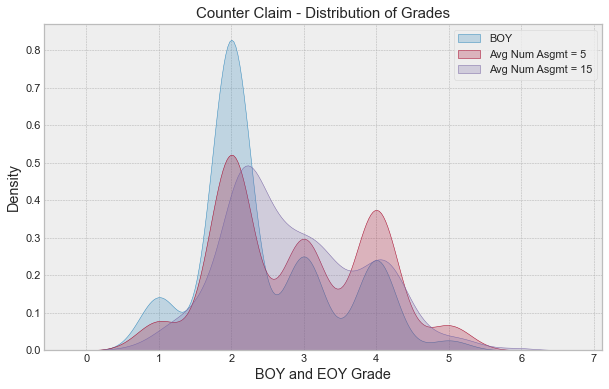

In [109]:
plt.style.use('bmh')

df_reg['ClaimCounter_z'] = (df_reg['ClaimCounter_diff_prediction'] + df_reg['ClaimCounter_x'])
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['ClaimCounter_x'], fill=True, label='BOY')
sns.kdeplot(df_reg['ClaimCounter_y'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['ClaimCounter_z'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Grade')
plt.ylabel('Density')
plt.title("Counter Claim - Distribution of Grades", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()


# just comparing real post grade and hypothetical post grade can't say much, it cannot can show growth 

### Reasons

In [110]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rf,df_reg['Reasons_diff'],
                                                    test_size=0.2)

In [111]:
model_r_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_r_rf.fit(Xr_train, yr_train) 
pred_r_train_rf= model_r_rf.predict(Xr_train)
print(np.sqrt(mean_squared_error(yr_train,pred_r_train_rf)))
print(r2_score(yr_train, pred_r_train_rf))

pred_r_test_rf = model_r_rf.predict(Xr_test)
print(np.sqrt(mean_squared_error(yr_test,pred_r_test_rf)))
print(r2_score(yr_test, pred_r_test_rf))

0.3926450932290212
0.8613048865816118
0.9195037105939066
0.16959808215111893


In [112]:
pred_r_hypo_rf = model_r_rf.predict(X_pred)
print(pd.Series(pred_r_hypo_rf).describe())
print(df_reg['Reasons_diff'].describe())

count    506.000000
mean       0.618914
std        0.493083
min       -1.618000
25%        0.424000
50%        0.572000
75%        0.825500
max        2.184000
dtype: float64
count    506.000000
mean       0.304348
std        1.046570
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Reasons_diff, dtype: float64


In [113]:
df_reg['Reasons_diff']

0      1.0
1     -1.0
2      1.0
3      2.0
4     -3.0
      ... 
504    1.0
505    2.0
506    1.0
507    2.0
508    1.0
Name: Reasons_diff, Length: 506, dtype: float64

In [114]:
df_reg['Reasons_diff_prediction'] = pd.Series(pred_r_hypo_rf)

In [115]:
df_reg['Reasons_diff_prediction']

0      0.902
1      0.474
2      0.728
3      1.150
4     -1.458
       ...  
504    1.458
505    1.120
506      NaN
507      NaN
508      NaN
Name: Reasons_diff_prediction, Length: 506, dtype: float64

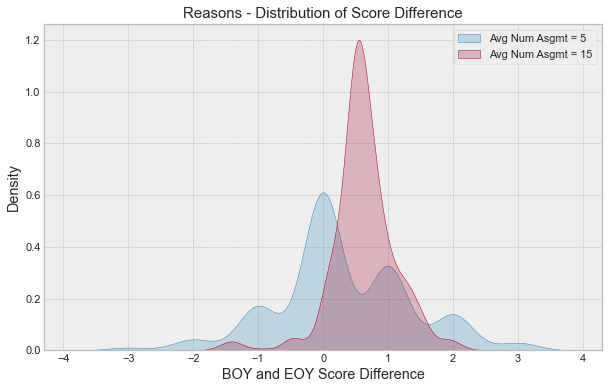

In [116]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Reasons_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Reasons_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Reasons - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

In [117]:
print(df_reg['Reasons_diff_prediction'].describe())
print(df_reg['Reasons_diff'].describe())

count    503.000000
mean       0.618112
std        0.494433
min       -1.618000
25%        0.424000
50%        0.570000
75%        0.827000
max        2.184000
Name: Reasons_diff_prediction, dtype: float64
count    506.000000
mean       0.304348
std        1.046570
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Reasons_diff, dtype: float64


### Evidence

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['Evidence_diff'],
                                                    test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.36569313002370535
0.8742351712828786
0.9924618232396828
-0.18539465772122665


In [119]:
pred_hypo_rf = model_rf.predict(X_pred)
print(pd.Series(pred_hypo_rf).describe())
print(df_reg['Evidence_diff'].describe())
df_reg['Evidence_diff_prediction'] = pd.Series(pred_hypo_rf)

count    506.000000
mean       0.564988
std        0.536380
min       -1.140000
25%        0.188500
50%        0.471000
75%        0.997500
max        2.302000
dtype: float64
count    506.000000
mean       0.225296
std        1.013099
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Evidence_diff, dtype: float64


In [120]:
print(df_reg['Evidence_diff_prediction'].describe())
print(df_reg['Evidence_diff'].describe())

count    503.000000
mean       0.565694
std        0.533632
min       -1.140000
25%        0.189000
50%        0.472000
75%        0.995000
max        2.302000
Name: Evidence_diff_prediction, dtype: float64
count    506.000000
mean       0.225296
std        1.013099
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Evidence_diff, dtype: float64


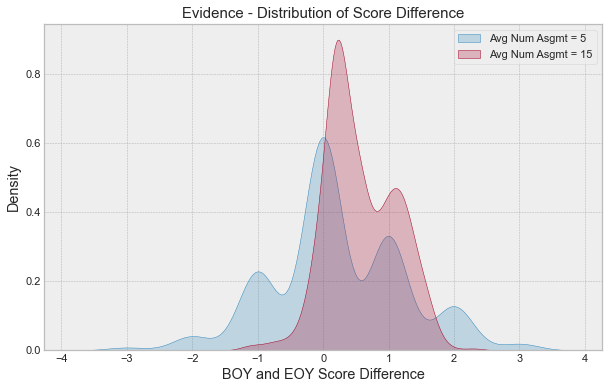

In [121]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Evidence_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Evidence_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Evidence - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

### Organization

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['Organization_diff'],
                                                    test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.35294748999400644
0.8808729274180318
0.9024211659664867
-0.0784932087576371


In [123]:
pred_hypo_rf = model_rf.predict(X_pred)
print(pd.Series(pred_hypo_rf).describe())
print(df_reg['Organization_diff'].describe())
df_reg['Organization_diff_prediction'] = pd.Series(pred_hypo_rf)

count    506.000000
mean       1.328403
std        0.303392
min       -0.800000
25%        1.194000
50%        1.319000
75%        1.479500
max        2.370000
dtype: float64
count    506.000000
mean       0.577075
std        0.994534
min       -3.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Organization_diff, dtype: float64


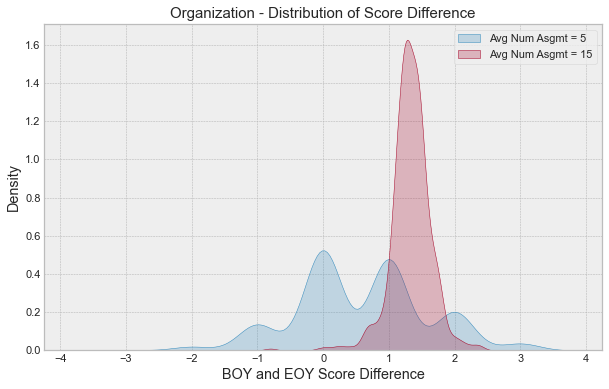

In [124]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Organization_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Organization_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Organization - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

In [125]:
print(df_reg['Organization_diff_prediction'].describe())
print(df_reg['Organization_diff'].describe())

count    503.000000
mean       1.328640
std        0.303956
min       -0.800000
25%        1.194000
50%        1.320000
75%        1.479000
max        2.370000
Name: Organization_diff_prediction, dtype: float64
count    506.000000
mean       0.577075
std        0.994534
min       -3.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Organization_diff, dtype: float64


### Audience

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['Audience_diff'],
                                                    test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.3621930718447284
0.8814507500869415
0.9153242239358398
-0.017826132291763885


In [127]:
pred_hypo_rf = model_rf.predict(X_pred)
print(pd.Series(pred_hypo_rf).describe())
print(df_reg['Audience_diff'].describe())
df_reg['Audience_diff_prediction'] = pd.Series(pred_hypo_rf)

count    506.00000
mean       0.36023
std        0.59535
min       -2.93800
25%        0.12400
50%        0.27800
75%        0.51900
max        2.51800
dtype: float64
count    506.000000
mean       0.365613
std        1.025769
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Audience_diff, dtype: float64


In [128]:
print(df_reg['Audience_diff_prediction'].describe())
print(df_reg['Audience_diff'].describe())

count    503.000000
mean       0.358331
std        0.596169
min       -2.938000
25%        0.123000
50%        0.278000
75%        0.514000
max        2.518000
Name: Audience_diff_prediction, dtype: float64
count    506.000000
mean       0.365613
std        1.025769
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Audience_diff, dtype: float64


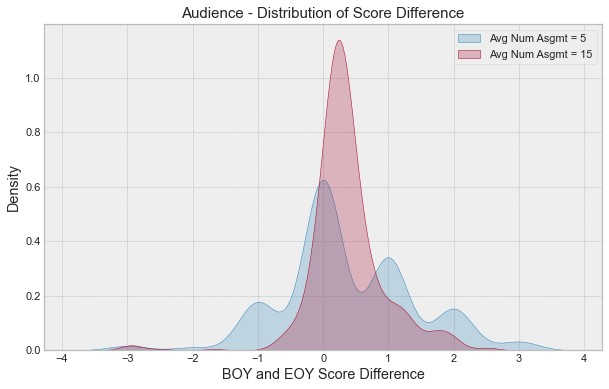

In [129]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Audience_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Audience_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Audience - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

### Conventions

In [130]:
df_reg.groupby(['student_grade_level']).size().reset_index(name='counts')

,student_grade_level,counts
0,6,127
1,7,17
2,8,299
3,9,57
4,10,6


In [131]:
df_reg.head()

,id_x,subtype,school_name,primary_teacher_name,class_code,student_name,student_grade_level,ClaimCounter_x,Reasons_x,Evidence_x,...,Organization_diff,Audience_diff,Conventions_diff,num_assignments_submitted_hypothetical,ClaimCounter_diff_prediction,ClaimCounter_z,Reasons_diff_prediction,Evidence_diff_prediction,Organization_diff_prediction,Audience_diff_prediction
0,14196305,4,Stuart Academy,Christian Kampschaefer,2SM7CQ,Aaron Anderson,8,2.0,1.0,1.0,...,0.0,-1.0,0.0,11.473422,-0.398,1.602,0.902,-0.138,1.142,-0.476
1,14476405,4,Crosby Middle,JACOB MAYER,KAY9NA,Aaron Reynolds,8,1.0,2.0,2.0,...,0.0,0.0,-1.0,15.112070,0.134,1.134,0.474,0.132,1.236,0.168
2,14397398,4,Kammerer Middle,Kimberly Crone,8JTX2A,Aaron Welch,8,3.0,3.0,3.0,...,2.0,2.0,1.0,13.708474,0.512,3.512,0.728,-0.102,1.574,0.974
3,14185857,4,Stuart Academy,Dalton Holt,LJ6A7W,Abdalla Hussein,8,1.0,1.0,1.0,...,1.0,1.0,1.0,11.701279,0.632,1.632,1.150,0.554,1.238,0.588
4,14568914,4,Crosby Middle,Brenda Gunnell,MHC2YQ,Abigail Grigsby,8,4.0,4.0,4.0,...,-3.0,-1.0,-1.0,18.545037,-1.858,2.142,-1.458,-1.102,-0.800,-0.120


In [132]:
df_reg.student_name.value_counts()

Dwight Mason      8
Madison Jones     4
Matthew Smith     4
Anthony Garcia    4
Alexis Dunn       3
                 ..
Markeis Carter    1
Ava Barrett       1
Jada Woolridge    1
Sydney Haygood    1
Willow Neal       1
Name: student_name, Length: 469, dtype: int64

In [133]:
df_reg["Conventions_diff"].isnull().sum()

0

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['Conventions_diff'],
                                                    test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.3317201807029902
0.8685712054805895
0.9578483364741385
-0.09352659237942529


In [135]:
pred_hypo_rf = model_rf.predict(X_pred)
print(pd.Series(pred_hypo_rf).describe())
print(df_reg['Conventions_diff'].describe())
df_reg['Conventions_diff_prediction'] = pd.Series(pred_hypo_rf)

count    506.000000
mean       0.273456
std        0.463187
min       -1.856000
25%        0.164500
50%        0.198000
75%        0.462000
max        2.062000
dtype: float64
count    506.000000
mean       0.262846
std        0.916344
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Conventions_diff, dtype: float64


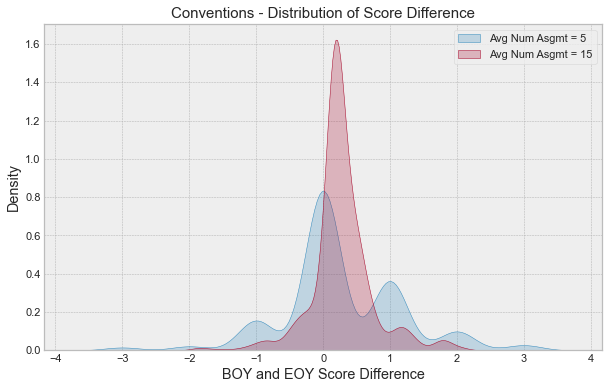

In [136]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Conventions_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Conventions_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Conventions - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

In [137]:
print(df_reg['Conventions_diff_prediction'].describe())
print(df_reg['Conventions_diff'].describe())

count    503.000000
mean       0.273211
std        0.464296
min       -1.856000
25%        0.164000
50%        0.198000
75%        0.462000
max        2.062000
Name: Conventions_diff_prediction, dtype: float64
count    506.000000
mean       0.262846
std        0.916344
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Conventions_diff, dtype: float64


## Reasoning

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_rf,df_reg['Reasoning_diff'],
                                                    test_size=0.2)

model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.3765050326409468
0.8771844460605032
0.9329302350816012
0.10459673687333126


In [139]:
pred_hypo_rf = model_rf.predict(X_pred)
print(pd.Series(pred_hypo_rf).describe())
print(df_reg['Reasoning_diff'].describe())
df_reg['Reasoning_diff_prediction'] = pd.Series(pred_hypo_rf)

count    506.000000
mean       0.971213
std        0.480879
min       -2.066000
25%        0.848500
50%        0.998000
75%        1.113500
max        2.564000
dtype: float64
count    506.000000
mean       0.553360
std        1.059665
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Reasoning_diff, dtype: float64


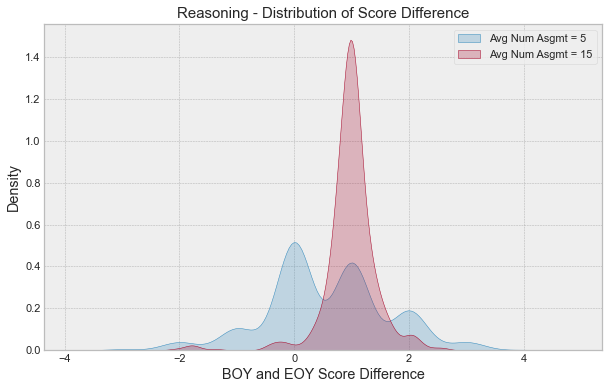

In [140]:
xlim = [-4,4]
ax.set_xlim(xlim)

sns.kdeplot(df_reg['Reasoning_diff'], fill=True, label='Avg Num Asgmt = 5')
sns.kdeplot(df_reg['Reasoning_diff_prediction'], fill=True, label='Avg Num Asgmt = 15')
plt.xlabel('BOY and EOY Score Difference')
plt.ylabel('Density')
plt.title("Reasoning - Distribution of Score Difference", fontsize=15)
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show()

In [141]:
print(df_reg['Reasoning_diff_prediction'].describe())
print(df_reg['Reasoning_diff'].describe())

count    503.000000
mean       0.971483
std        0.481200
min       -2.066000
25%        0.850000
50%        0.998000
75%        1.113000
max        2.564000
Name: Reasoning_diff_prediction, dtype: float64
count    506.000000
mean       0.553360
std        1.059665
min       -3.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Reasoning_diff, dtype: float64
